#Softmax Regression with Pytorch

In this code, I will hands on Machine Learning coding skill with Logistic Regression. The dataset is used in this project is advertising.csv with 5 features [Sepal_Length, Sepal_Width, Petal_Length, Petal_Width, Label]. Specifically, 4 features are Sepal_Length, Sepal_Width, Petal_Length, Petal_Width and label is Label.

##[Some interview question](https://medium.com/analytics-vidhya/20-interview-questions-on-linear-regression-and-logistic-regression-ef4d341d2805)

In [ ]:
!git clone https://github.com/NT-ThuHang/Hands_On_Machine_Learning_With_Pytorch.git
%cd /content/Hands_On_Machine_Learning_With_Pytorch

fatal: destination path 'Hands_On_Machine_Learning_With_Pytorch' already exists and is not an empty directory.
/content/Hands_On_Machine_Learning_With_Pytorch


##Library

In [ ]:
#standard
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px 

#prepare data
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

#modeling
import torch
from torch import nn, optim 
import torch.nn.functional as F 
from tqdm import tqdm 

#device 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## EDA

In [ ]:
dataset = pd.read_csv("./Dataset/iris_3_class.csv")
dataset.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Label
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### Information about data

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sepal_Length   150 non-null    float64
 1    Sepal_Width   150 non-null    float64
 2    Petal_Length  150 non-null    float64
 3    Petal_Width   150 non-null    float64
 4    Label         150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


##Correlation 

In [ ]:
corr = dataset.corr()
corr.style.background_gradient()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Label
Sepal_Length,1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal_Width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal_Length,0.871754,-0.420516,1.000000,0.962757,0.949043
Petal_Width,0.817954,-0.356544,0.962757,1.000000,0.956464
Label,0.782561,-0.419446,0.949043,0.956464,1.000000


###Outlier detection

In [ ]:
dataset.columns

Index(['Sepal_Length', ' Sepal_Width', ' Petal_Length', ' Petal_Width',
       ' Label'],
      dtype='object')

In [ ]:
def boxplot(dataset, colors):
  for feature in dataset.columns:
    fig = px.box(dataset, y = feature, title="<b>"+feature, color = colors, 
                 boxmode = "group", template = "plotly_dark", points = "all")
    fig.update_layout(title_x = 0.5, title_font_size = 30, font_size = 15, font_color = "aqua")
    fig.show()
    
boxplot(dataset, dataset.iloc[:,-1].values)

In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values.astype("int")
n_features = dataset.shape[1]-1 
n_classes = len(np.unique(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
np.unique(y)

array([0, 1, 2])

In [ ]:
X_train = torch.tensor(X_train, dtype = torch.float).to(device) 
X_test = torch.tensor(X_test, dtype = torch.float).to(device) 
y_train = F.one_hot(torch.tensor(y_train), num_classes = n_classes)
y_train = torch.tensor(y_train, dtype = torch.float).to(device)
y_test = torch.tensor(y_test, dtype = torch.float).to(device) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



In [ ]:
class IrisDataset(Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __len__(self):
    return self.X.size()[0]

  def __getitem__(self, idx):
    return [self.X[idx], self.y[idx]]


In [ ]:
train_loader = DataLoader(IrisDataset(X_train, y_train), batch_size = 1, shuffle = True)

#Modeling

In [ ]:
class SoftmaxRegression(nn.Module):
  def __init__(self, n_features, n_classes):
    super(SoftmaxRegression, self).__init__()
    self.linear = nn.Linear(n_features, n_classes)

  def forward(self, X):
    return F.softmax(self.linear(X))

In [ ]:
#set up model
epochs = 500
model = SoftmaxRegression(n_features, n_classes).to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 1e-3)

In [ ]:
losses = []
acc = []
for epoch in range(epochs):
  epoch_loss = []
  epoch_acc = []
  #inner loop
  for i, (data, label) in enumerate(train_loader):
    optimizer.zero_grad()

    #get sample
    data = data.to(device)
    label = label.to(device)

    #forward
    probas = model(data) 

    #loss
    loss = loss_func(probas, label)
    epoch_loss.append(loss.item()/data.size()[0])

    with torch.no_grad():
      label_truth = torch.argmax(label, dim = 1)
      label_pred = torch.argmax(probas, dim = 1)
      correct = torch.sum(label_truth == label_pred)
      epoch_acc.append(correct.item()/data.size()[0])

    #backward
    loss.backward()
    optimizer.step()
  
  losses.append(np.mean(epoch_loss))
  acc.append(np.mean(epoch_acc))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



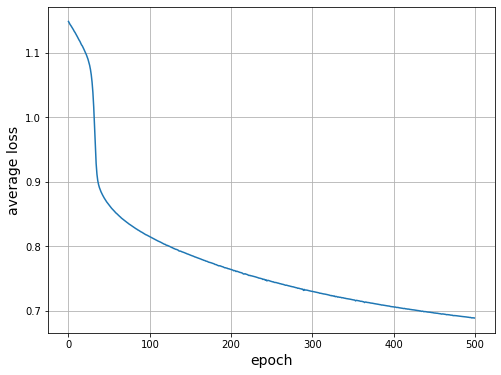

In [ ]:
plt.figure(num=None, figsize=(8, 6))
plt.plot(losses)

# Adding some bells and whistles to the plot
plt.grid(True, which="both")
plt.xlabel('epoch', fontsize=14)
plt.ylabel('average loss', fontsize=14)
plt.show()

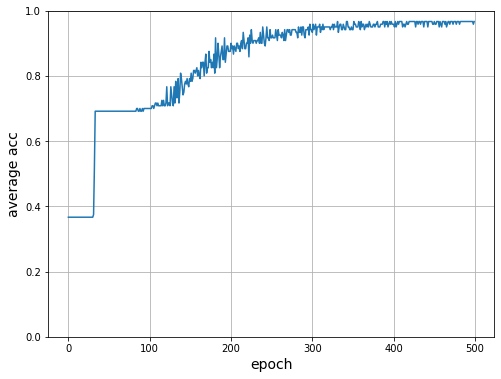

In [ ]:
plt.figure(num=None, figsize=(8, 6))
plt.plot(acc)

# Adding some bells and whistles to the plot
plt.grid(True, which="both")
plt.ylim(0, 1)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('average acc', fontsize=14)

plt.show()